In [12]:
#Read file with Dataset and xarray
from netCDF4 import Dataset
import xarray as xr

ds1 = Dataset('D:/Projects/file.nc')
ds2 = xr.open_dataset('D:/Projects/file.nc')
#ds1
ds2

<xarray.Dataset>
Dimensions:    (LAT: 72, LON: 144, TIME: 8034, bnds: 2)
Coordinates:
  * LON        (LON) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * LAT        (LAT) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * TIME       (TIME) float64 1.998e+07 1.998e+07 ... 2.019e+07 2.019e+07
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds  (TIME, bnds) float64 ...
    PREC       (TIME, LAT, LON) float32 ...
Attributes:
    history:      FERRET V6.65   23-Jun-20
    Conventions:  CF-1.0

In [13]:
#Set variables
rain = ds1.variables['PREC'][:]#(TIME SIZE=8034, LAT SIZE=72, LON SIZE=144)
lat = ds1.variables['LAT'][:]#LAT SIZE = 72
lon = ds1.variables['LON'][:]#LON SIZE= 144
time = ds1.variables['TIME'][:]#TIME SIZE= 8034  Also, Note that the dataset starts on Jan 01, 1998

In [14]:
#Print variables
#rain
lat
#lon
#time

masked_array(data=[-88.75, -86.25, -83.75, -81.25, -78.75, -76.25, -73.75,
                   -71.25, -68.75, -66.25, -63.75, -61.25, -58.75, -56.25,
                   -53.75, -51.25, -48.75, -46.25, -43.75, -41.25, -38.75,
                   -36.25, -33.75, -31.25, -28.75, -26.25, -23.75, -21.25,
                   -18.75, -16.25, -13.75, -11.25,  -8.75,  -6.25,  -3.75,
                    -1.25,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
                    16.25,  18.75,  21.25,  23.75,  26.25,  28.75,  31.25,
                    33.75,  36.25,  38.75,  41.25,  43.75,  46.25,  48.75,
                    51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
                    68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,
                    86.25,  88.75],
             mask=False,
       fill_value=1e+20)

In [15]:
#Find min and max values
import numpy as np

np.max(lat)
#np.min(lon)

88.75

In [16]:
#Find location of value
#np.where(rain == 735.7725)
np.where(time == 19981231)

(array([364], dtype=int64),)

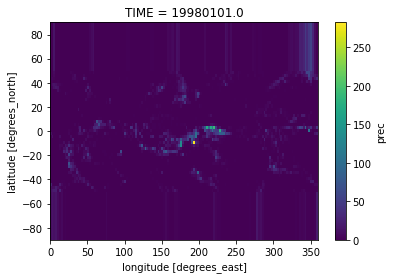

In [17]:
#Plot rain at index
import matplotlib.pyplot as plt
import matplotlib as mpl

ds2.PREC[0].plot()

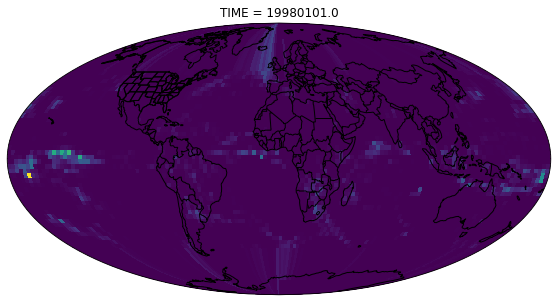

In [22]:
#Plot rain on map
import cartopy.crs as ccrs
import cartopy.feature as cft

days1 = np.arange(0,1)#Set range of days 
for i in days1:
    plt.figure(figsize=(20,5))#Set figure size
    ax1 = plt.axes(projection=ccrs.Mollweide())#Set projection type
    ds2.PREC[i].plot(ax=ax1, transform=ccrs.PlateCarree(), add_colorbar=False)#Plot at index
    #Add map features
    ax1.coastlines()
    ax1.add_feature(cft.BORDERS)
    ax1.add_feature(cft.STATES)
    #Save the figure
    plt.savefig(f'D:/Projects/maps1/{i+1}.jpg')
    plt.pause(1)

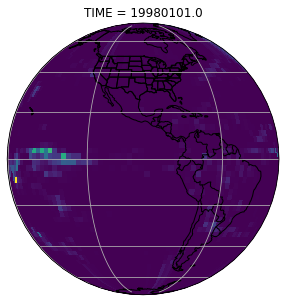

In [21]:
#Orthographic map
days2 = np.arange(0,1)
#degrees = np.arange(0,36)
for i in days2:
    plt.figure(figsize=(20,5))
    ax2 = plt.axes(projection=ccrs.Orthographic(-95.7129+(i*10), 0))#(US-coords: -95.7129, 37.0902)
    ds2.PREC[i].plot(ax=ax2, transform=ccrs.PlateCarree(), add_colorbar=False)
    
    ax2.gridlines()
    ax2.coastlines()
    ax2.add_feature(cft.BORDERS)
    ax2.add_feature(cft.STATES)
    
    plt.savefig(f'D:/Projects/maps1/{i+1}.jpg')
    plt.pause(1)

In [20]:
#Create timelapse gif
import PIL

image_frames = []
days3 = np.arange(1,2)
for k in days3:
    new_frame = PIL.Image.open(f'D:/Projects/maps1/{k}.jpg') 
    image_frames.append(new_frame)
#Save as GIF
image_frames[0].save('timelapse.gif', format='GIF', append_images = image_frames[1: ], save_all = True, duration = 100, 
                     loop = 0)

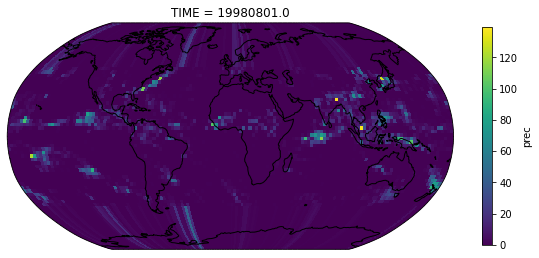

In [44]:
rain = ds.PREC.sel(TIME=19980801, method="nearest")
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
rain.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.4})